## Summer School on Deep Learning Surathkal, Karnataka - 2019

### Small Unet-Depth1(No Augmentation)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
data_dir_list=os.chdir('/content/drive/My Drive/SSDL/Day3/DATA')

In [0]:
import os
import cv2
import numpy as np
PATH = os.getcwd()
data_path = PATH + '/D1'
data_dir_list = os.listdir(data_path)

In [4]:
img_data_list=[]
for dataset in data_dir_list:
    img_list= sorted(os.listdir(data_path+'/'+ dataset))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    var=0;
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        var=var+1
        if var==20:
          break
print("Loaded_Sccessfully")
data = np.array(img_data_list)
print(data.shape)

Loaded the images of dataset-Data

Loaded_Sccessfully
(20, 128, 128)


In [5]:
PATH1 = os.getcwd()
data_path1 = PATH1 + '/L1'
data_dir_list1 = os.listdir(data_path1)
print(data_dir_list1)

['label']


In [6]:
img_data_list1=[]
for dataset1 in data_dir_list1:
    img_list1=sorted(os.listdir(data_path1+'/'+ dataset1))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset1))
    var=0;
    for img1 in img_list1:
        input_img1=cv2.imread(data_path1 + '/'+ dataset1 + '/'+ img1 )
        input_img1=cv2.cvtColor(input_img1, cv2.COLOR_BGR2GRAY)
        input_img_resize1=cv2.resize(input_img1,(128,128))
        img_data_list1.append(input_img_resize1)
        var=var+1
        if var==20:
          break
label= np.array(img_data_list1)
print(label.shape)

Loaded the images of dataset-label

(20, 128, 128)


(128, 128)


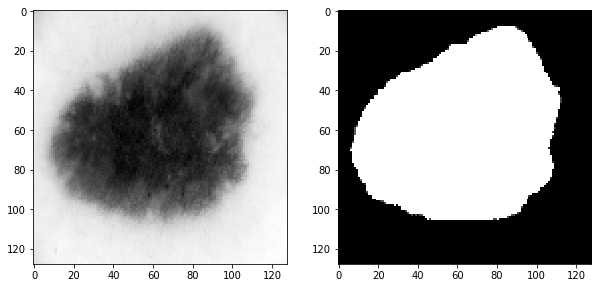

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(data [0],'gray')
plt.subplot(122).imshow(label[0],'gray')
print(data[0].shape)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
x,y = shuffle(data,label, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [0]:
X_train = np.reshape(X_train,(-1,128,128,1))
y_train = np.reshape(y_train,(-1,128,128,1))

X_train = X_train.astype('float32')/255
y_train = y_train.astype('float32')/255

X_test = np.reshape(X_test,(-1,128,128,1))
y_test = np.reshape(y_test,(-1,128,128,1))

X_test = X_test.astype('float32')/255
y_test = y_test.astype('float32')/255

In [11]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(16, 128, 128, 1)
(16, 128, 128, 1)
(4, 128, 128, 1)
(4, 128, 128, 1)


In [12]:
mean = np.mean(X_train)
std = np.std(X_train)

print(mean)
print(std)

X_train = X_train-mean
X_train = X_train/std

X_test = X_test-mean
X_test = X_test/std

0.5904963
0.1954056


In [13]:
!pip install medpy
from keras.layers import *
import keras
from keras import Model
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
#from livelossplot.keras import PlotLossesCallback
from medpy.metric import dc, precision, recall

Using TensorFlow backend.


In [14]:
input_layer = Input(shape=(128,128,1))

c1 = Conv2D(8, (3,3),  padding='same',kernel_initializer='glorot_uniform')(input_layer)
ba1 = BatchNormalization()(c1)
a1 = Activation('relu')(ba1)
ba2 = BatchNormalization()(a1)
p1 = MaxPooling2D(pool_size=(2,2)) (ba2)

c2 = Conv2D(16, (3,3),  padding='same',kernel_initializer='glorot_uniform')(p1)
bb1 = BatchNormalization()(c2)
a2 = Activation('relu')(bb1)
bb2 = BatchNormalization()(a2)
p2 = MaxPooling2D(pool_size=(2,2)) (bb2)

ct = Conv2DTranspose(16,kernel_size=(2,2),strides=(2,2),kernel_initializer='glorot_uniform')(p2)
bc1 = BatchNormalization()(ct)
add1 = Add()([bb2,bc1])
ct2 = Conv2DTranspose(32,kernel_size=(2,2),strides=(2,2),kernel_initializer='glorot_uniform')(add1)
bd1 = BatchNormalization()(ct2)
c3 = Conv2D(1, (3,3),  padding='same',kernel_initializer='glorot_uniform')(bd1)
bd2 = BatchNormalization()(c3)

model = Model(input_layer,bd2)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 8)  0           batch_normalization_1[0][0]      
_____________________________________

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [0]:
import math
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('Small_unet_pool_k.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

In [0]:
model.compile(loss='mse', optimizer=optimizer, metrics=[dice_coef,'accuracy'])

In [0]:
history = model.fit(X_train, y_train,validation_split = (0.2),epochs=1000,verbose=1,callbacks=[es,mc])

Train on 576 samples, validate on 144 samples
Epoch 1/1000
576/576 [==============================] - 3s 4ms/step - loss: 1.0011 - dice_coef: 0.9154 - acc: 0.4273 - val_loss: 1.8726 - val_dice_coef: 1.3742 - val_acc: 0.2678

Epoch 00001: val_loss improved from inf to 1.87264, saving model to Small_unet_pool_k.h5
Epoch 2/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.8121 - dice_coef: 1.4047 - acc: 0.3294 - val_loss: 1.0647 - val_dice_coef: 1.7594 - val_acc: 0.2935

Epoch 00002: val_loss improved from 1.87264 to 1.06473, saving model to Small_unet_pool_k.h5
Epoch 3/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.7466 - dice_coef: 1.4234 - acc: 0.4008 - val_loss: 0.7713 - val_dice_coef: 2.5269 - val_acc: 0.3426

Epoch 00003: val_loss improved from 1.06473 to 0.77126, saving model to Small_unet_pool_k.h5
Epoch 4/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.6951 - dice_coef: 1.4176 - acc: 0.4160 - val_loss: 0.7619 - val_


Epoch 00032: val_loss improved from 0.23021 to 0.19723, saving model to Small_unet_pool_k.h5
Epoch 33/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1965 - dice_coef: 0.8301 - acc: 0.7885 - val_loss: 0.2015 - val_dice_coef: 0.7636 - val_acc: 0.7673

Epoch 00033: val_loss did not improve from 0.19723
Epoch 34/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1897 - dice_coef: 0.8210 - acc: 0.7961 - val_loss: 0.2135 - val_dice_coef: 0.7319 - val_acc: 0.7466

Epoch 00034: val_loss did not improve from 0.19723
Epoch 35/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1837 - dice_coef: 0.8106 - acc: 0.8005 - val_loss: 0.1920 - val_dice_coef: 0.7090 - val_acc: 0.7757

Epoch 00035: val_loss improved from 0.19723 to 0.19199, saving model to Small_unet_pool_k.h5
Epoch 36/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1783 - dice_coef: 0.8024 - acc: 0.8053 - val_loss: 0.1749 - val_dice_coef: 0.7114 - val_acc:

Epoch 65/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1195 - dice_coef: 0.6203 - acc: 0.8442 - val_loss: 0.1235 - val_dice_coef: 0.6264 - val_acc: 0.8403

Epoch 00065: val_loss improved from 0.12447 to 0.12347, saving model to Small_unet_pool_k.h5
Epoch 66/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1185 - dice_coef: 0.6171 - acc: 0.8450 - val_loss: 0.1231 - val_dice_coef: 0.6357 - val_acc: 0.8407

Epoch 00066: val_loss improved from 0.12347 to 0.12306, saving model to Small_unet_pool_k.h5
Epoch 67/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1180 - dice_coef: 0.6139 - acc: 0.8445 - val_loss: 0.1228 - val_dice_coef: 0.6293 - val_acc: 0.8405

Epoch 00067: val_loss improved from 0.12306 to 0.12282, saving model to Small_unet_pool_k.h5
Epoch 68/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1184 - dice_coef: 0.6095 - acc: 0.8445 - val_loss: 0.1228 - val_dice_coef: 0.6125 - val_acc: 0.8397

E


Epoch 00132: val_loss did not improve from 0.11715
Epoch 133/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1124 - dice_coef: 0.5671 - acc: 0.8507 - val_loss: 0.1195 - val_dice_coef: 0.5790 - val_acc: 0.8443

Epoch 00133: val_loss did not improve from 0.11715
Epoch 134/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1114 - dice_coef: 0.5692 - acc: 0.8514 - val_loss: 0.1195 - val_dice_coef: 0.5815 - val_acc: 0.8437

Epoch 00134: val_loss did not improve from 0.11715
Epoch 135/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1111 - dice_coef: 0.5712 - acc: 0.8512 - val_loss: 0.1173 - val_dice_coef: 0.5863 - val_acc: 0.8440

Epoch 00135: val_loss did not improve from 0.11715
Epoch 136/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1108 - dice_coef: 0.5721 - acc: 0.8518 - val_loss: 0.1178 - val_dice_coef: 0.5893 - val_acc: 0.8436

Epoch 00136: val_loss did not improve from 0.11715
Epoch 137/1000
576/5

Epoch 202/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1121 - dice_coef: 0.5718 - acc: 0.8504 - val_loss: 0.1212 - val_dice_coef: 0.6328 - val_acc: 0.8401

Epoch 00202: val_loss did not improve from 0.11453
Epoch 203/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1110 - dice_coef: 0.5742 - acc: 0.8521 - val_loss: 0.1159 - val_dice_coef: 0.6216 - val_acc: 0.8473

Epoch 00203: val_loss did not improve from 0.11453
Epoch 204/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1100 - dice_coef: 0.5758 - acc: 0.8539 - val_loss: 0.1152 - val_dice_coef: 0.5778 - val_acc: 0.8476

Epoch 00204: val_loss did not improve from 0.11453
Epoch 205/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1099 - dice_coef: 0.5764 - acc: 0.8527 - val_loss: 0.1198 - val_dice_coef: 0.5677 - val_acc: 0.8455

Epoch 00205: val_loss did not improve from 0.11453
Epoch 206/1000
576/576 [==============================] - 1s 1ms/step - 


Epoch 00236: val_loss did not improve from 0.11426
Epoch 237/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1096 - dice_coef: 0.5786 - acc: 0.8532 - val_loss: 0.1153 - val_dice_coef: 0.5866 - val_acc: 0.8476

Epoch 00237: val_loss did not improve from 0.11426
Epoch 238/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1095 - dice_coef: 0.5792 - acc: 0.8542 - val_loss: 0.1173 - val_dice_coef: 0.5682 - val_acc: 0.8483

Epoch 00238: val_loss did not improve from 0.11426
Epoch 239/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1099 - dice_coef: 0.5772 - acc: 0.8540 - val_loss: 0.1164 - val_dice_coef: 0.5634 - val_acc: 0.8483

Epoch 00239: val_loss did not improve from 0.11426
Epoch 240/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1087 - dice_coef: 0.5809 - acc: 0.8545 - val_loss: 0.1171 - val_dice_coef: 0.5580 - val_acc: 0.8472

Epoch 00240: val_loss did not improve from 0.11426
Epoch 241/1000
576/5

576/576 [==============================] - 1s 1ms/step - loss: 0.1094 - dice_coef: 0.5805 - acc: 0.8549 - val_loss: 0.1149 - val_dice_coef: 0.5720 - val_acc: 0.8486

Epoch 00272: val_loss did not improve from 0.11382
Epoch 273/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1100 - dice_coef: 0.5807 - acc: 0.8536 - val_loss: 0.1167 - val_dice_coef: 0.6180 - val_acc: 0.8434

Epoch 00273: val_loss did not improve from 0.11382
Epoch 274/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1093 - dice_coef: 0.5807 - acc: 0.8531 - val_loss: 0.1147 - val_dice_coef: 0.5885 - val_acc: 0.8481

Epoch 00274: val_loss did not improve from 0.11382
Epoch 275/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1085 - dice_coef: 0.5822 - acc: 0.8547 - val_loss: 0.1139 - val_dice_coef: 0.5880 - val_acc: 0.8493

Epoch 00275: val_loss did not improve from 0.11382
Epoch 276/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1095 - 

576/576 [==============================] - 1s 1ms/step - loss: 0.1087 - dice_coef: 0.5835 - acc: 0.8557 - val_loss: 0.1131 - val_dice_coef: 0.5933 - val_acc: 0.8502

Epoch 00307: val_loss did not improve from 0.11254
Epoch 308/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1087 - dice_coef: 0.5827 - acc: 0.8549 - val_loss: 0.1134 - val_dice_coef: 0.6096 - val_acc: 0.8501

Epoch 00308: val_loss did not improve from 0.11254
Epoch 309/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1072 - dice_coef: 0.5853 - acc: 0.8579 - val_loss: 0.1128 - val_dice_coef: 0.6143 - val_acc: 0.8502

Epoch 00309: val_loss did not improve from 0.11254
Epoch 310/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1084 - dice_coef: 0.5834 - acc: 0.8561 - val_loss: 0.1138 - val_dice_coef: 0.5879 - val_acc: 0.8500

Epoch 00310: val_loss did not improve from 0.11254
Epoch 311/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1079 - 

576/576 [==============================] - 1s 1ms/step - loss: 0.1072 - dice_coef: 0.5890 - acc: 0.8567 - val_loss: 0.1144 - val_dice_coef: 0.5807 - val_acc: 0.8498

Epoch 00377: val_loss did not improve from 0.11170
Epoch 378/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1065 - dice_coef: 0.5892 - acc: 0.8579 - val_loss: 0.1131 - val_dice_coef: 0.6023 - val_acc: 0.8508

Epoch 00378: val_loss did not improve from 0.11170
Epoch 379/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1061 - dice_coef: 0.5910 - acc: 0.8595 - val_loss: 0.1129 - val_dice_coef: 0.5842 - val_acc: 0.8511

Epoch 00379: val_loss did not improve from 0.11170
Epoch 380/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1060 - dice_coef: 0.5932 - acc: 0.8596 - val_loss: 0.1135 - val_dice_coef: 0.5821 - val_acc: 0.8486

Epoch 00380: val_loss did not improve from 0.11170
Epoch 381/1000
576/576 [==============================] - 1s 1ms/step - loss: 0.1068 - 

In [0]:
model.evaluate(X_test,y_test)

180/180 [==============================] - 0s 446us/step


[0.11540372951163186, 0.6110254791047838, 0.8478027330504523]

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(416)

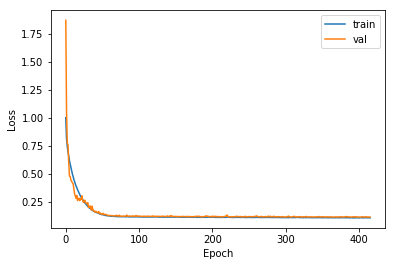

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

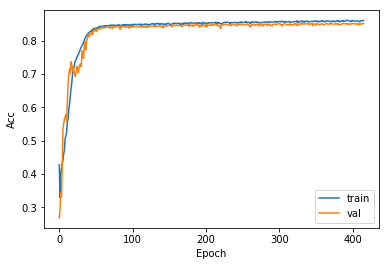

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
from keras.models import load_model
model.load_weights('/content/drive/My Drive/SSDL/Day3/Small_Unet_Pool_No_Aug/Weights/Small_unet_pool_k.h5')

In [0]:
a = np.reshape(X_test[3],(128,128))
b = np.reshape(y_test[3],(128,128))

c = np.copy(a)
d = np.copy(b)

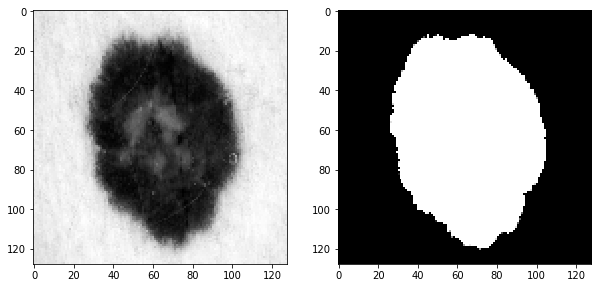

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(a, 'gray')
plt.subplot(122).imshow(b,'gray')

In [0]:
testing_image = np.reshape(X_test[3], (1,128,128,1))

In [0]:
prediction = model.predict(testing_image)
prediction.shape
prediction = prediction.reshape((128,128))

-0.28979254
1.2749387


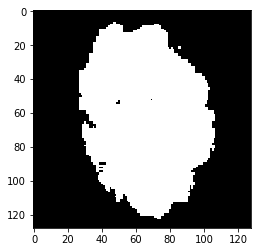

In [20]:
sample = prediction > 0.5
print(np.min(prediction))
print(np.max(prediction))
plt.imshow(sample, cmap = "gray")

Text(0.5, 0, 'PREDICTION')

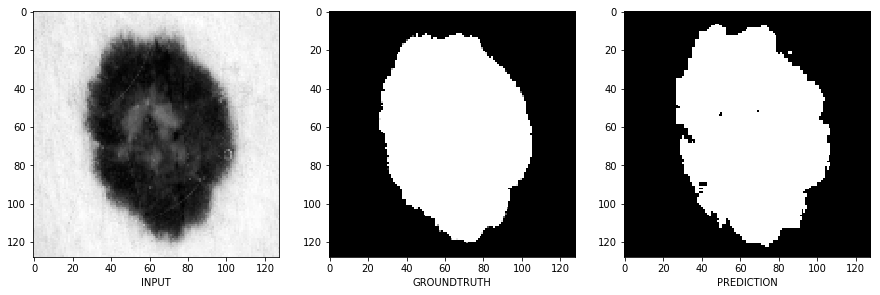

In [21]:
plt.figure(figsize=(15,15))

plt.subplot(131).imshow(c,'gray')
plt.xlabel('INPUT')

plt.subplot(132).imshow(d,'gray')
plt.xlabel('GROUNDTRUTH')

plt.subplot(133).imshow(sample,'gray')
plt.xlabel('PREDICTION')

In [22]:
train_pred = model.predict(X_train, batch_size=32)
train_result = np.zeros(train_pred.shape)
train_result[train_pred>0.5] = 1
train_result[train_pred<=0.5] = 0
dice = dc(train_result, y_train)
pre  = precision(train_result,y_train)
re   = recall(train_result,y_train)
print('Train dc: '  + str(dice))
print('Train pre: ' + str(pre))
print('Train re: '  + str(re))

Train dc: 0.8129983125106436
Train pre: 0.9359616447145632
Train re: 0.7185922084319709


In [23]:
test_pred = model.predict(X_test, batch_size=32)
test_result = np.zeros(test_pred.shape)
test_result[test_pred>0.5] = 1
test_result[test_pred<=0.5] = 0
dice = dc(test_result, y_test)
pre  = precision(test_result,y_test)
re   = recall(test_result,y_test)
print('Test dc: '  + str(dice))
print('Test pre: ' + str(pre))
print('Test re: '  + str(re))

Test dc: 0.6218349309099963
Test pre: 0.8690931867214141
Test re: 0.48410606295549696
